In [35]:
pip install --upgrade statsmodels

Requirement already up-to-date: statsmodels in c:\users\14027\onedrive\attachments\lib\site-packages (0.13.5)
Note: you may need to restart the kernel to use updated packages.


In [36]:
import statsmodels
print(statsmodels.__version__)


0.13.5


In [58]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
# Load in the dataset
path = "C:/Users/14027/Documents/Graduate_Schoolish/DSC_680/Term Project 3/walmart.csv"
df = pd.read_csv(path)
df.head()
df.isna().any()
#No Null values
df.shape
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


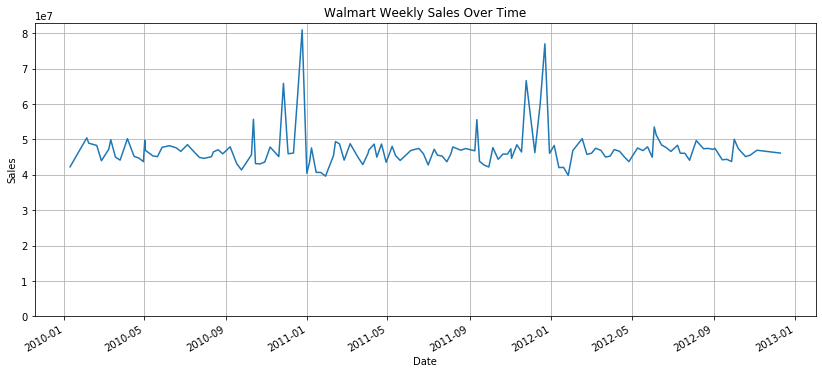

In [84]:
# Make date column datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Group by weekly sales
sales_ts = df.groupby('Date')['Weekly_Sales'].sum()

# Plot
plt.figure(figsize=(14, 6))
sales_ts.plot()
plt.ylim(bottom=0) 
plt.title("Walmart Weekly Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.show()


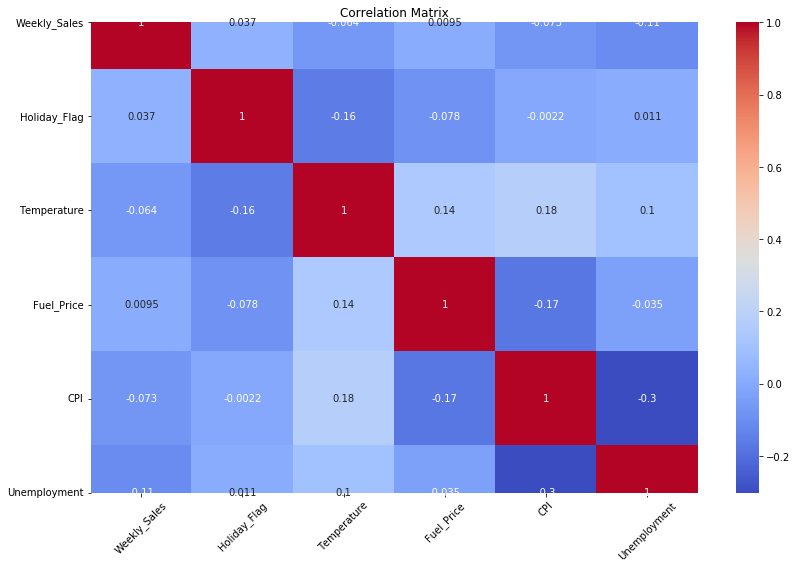

In [65]:
# Plotting the correlation of weekly sales with other variables
df1 = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Keep y-axis labels horizontal (adjust if needed)
plt.tight_layout()
plt.grid(True)
plt.show()

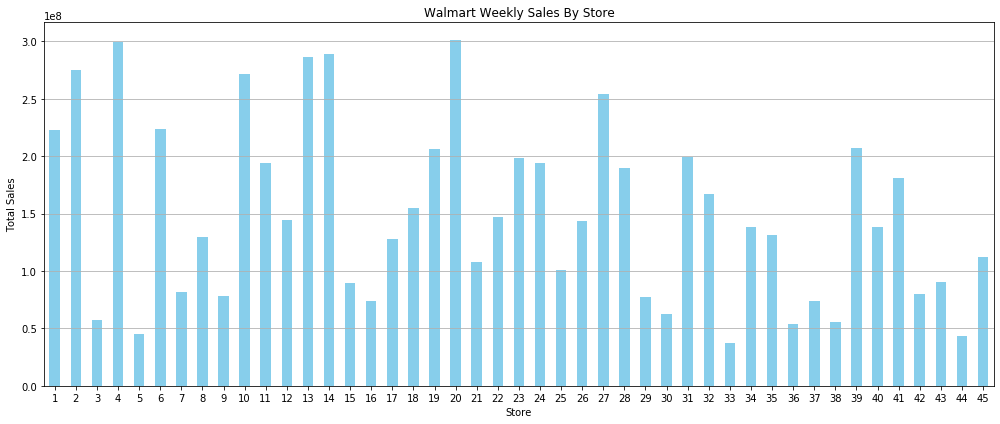

In [85]:
# Sales by store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_index()

# Plot as bar chart
store_sales.plot(kind='bar', figsize=(14, 6), title="Walmart Weekly Sales By Store", color='skyblue')

plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.grid(axis='y')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.tight_layout()
plt.show()


In [86]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Try with a typical Weekly
# decomposition = seasonal_decompose(sales_ts, model='additive', period=12)
# decomposition.plot()
# plt.show()


In [87]:
# # Try with a typical Monthly
# decomposition = seasonal_decompose(sales_ts, model='additive', period=52)
# decomposition.plot()
# plt.show()


C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


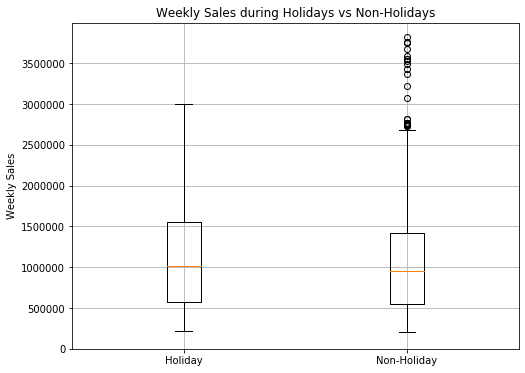

In [94]:
# Checking if there is a significant difference in sales during holidays
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

plt.figure(figsize=(8, 6))
plt.boxplot([holiday_sales, non_holiday_sales], labels=['Holiday', 'Non-Holiday'])
plt.title('Weekly Sales during Holidays vs Non-Holidays')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.ylim(bottom=0) 
plt.show()


In [47]:
# Train and fit the ARIMA Model full dataset
## Remove the holidays

train = sales_ts[:'2011']   # Adjust based on actual data range
test = sales_ts['2011':]

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,1,1))  # (p,d,q) - tune as needed
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1701.581
Date:                Tue, 29 Jul 2025   AIC                           3409.162
Time:                        13:10:06   BIC                           3416.947
Sample:                             0   HQIC                          3412.311
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3238      0.085      3.794      0.000       0.157       0.491
ma.L1         -0.9440      0.049    -19.081      0.000      -1.041      -0.847
sigma2      4.557e+13        nan        nan        n

C:\Users\14027\OneDrive\Attachments\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\14027\OneDrive\Attachments\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\14027\OneDrive\Attachments\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [92]:
# Store #4 Forecasting
# Train and fit the ARIMA Model 
# Ensure 'Date' is datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Filter for Store 4
sales_4 = df[df['Store'] == 4]['Weekly_Sales']

# Split into train and test
train4 = sales_4[:'2011']
test4 = sales_4['2011':]

# Fit ARIMA model
model4 = ARIMA(train4, order=(1, 1, 1))
model_fit4 = model4.fit()

# Summary of the model
print(model_fit4.summary())

C:\Users\14027\OneDrive\Attachments\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\14027\OneDrive\Attachments\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\14027\OneDrive\Attachments\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1392.647
Date:                Tue, 29 Jul 2025   AIC                           2791.294
Time:                        15:59:50   BIC                           2799.080
Sample:                             0   HQIC                          2794.444
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2511      0.118      2.119      0.034       0.019       0.483
ma.L1         -0.8759      0.074    -11.764      0.000      -1.022      -0.730
sigma2      9.609e+10   1.78e-13   5.39e+23      0.0

C:\Users\14027\OneDrive\Attachments\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in 

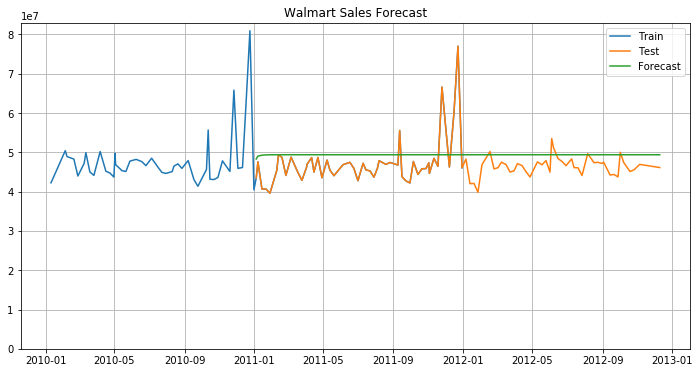

In [95]:
# Create the forecast and visualize Full Dataset
# forecast = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
start = len(train)
end = len(train) + len(test) - 1

forecast = model_fit.predict(start=start, end=end, typ='levels')
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')  
plt.legend()
plt.title("Walmart Weekly Sales Forecast (Full Dataset)")
plt.grid(True)
plt.ylim(bottom=0) 
plt.show()


C:\Users\14027\OneDrive\Attachments\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in 

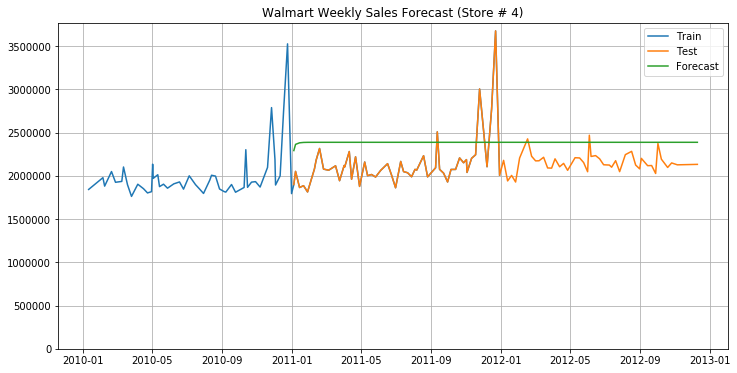

In [98]:
# Store 4
start4 = len(train4)
end4 = len(train4) + len(test4) - 1

forecast4 = model_fit4.predict(start=start4, end=end4, typ='levels')
plt.figure(figsize=(12,6))
plt.plot(train4, label='Train')
plt.plot(test4, label='Test')
plt.plot(test4.index, forecast4, label='Forecast')  
plt.legend()
plt.title("Walmart Weekly Sales Forecast (Store # 4)")
plt.grid(True)
plt.ylim(bottom=0) 
plt.show()


In [56]:
# Evaluate the model 
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.2f}')

RMSE: 5365266.98


In [97]:
rmse = np.sqrt(mean_squared_error(test4, forecast4))
print(f'RMSE: {rmse:.2f}')

RMSE: 332278.63
